In [2]:
import numpy as np
import tt
from tt.amen import amen_solve
import matplotlib.pyplot as plt

# Diffusion equation
We need to solve the diffusion equation:

$\frac{\partial}{\partial t} c(x,t) - D \frac{{\partial}^2}{\partial x^2} c(x,t) = 0 $

With conditions $c(x, 0) = \frac{1}{\sqrt(2 \pi)} e^{\frac{x}{2}}$ and $c(5, t) = c(-5, t) = 0$.


## 1. Creating equation in TT-format

Our boundaries will be $[-5, 5] \times [0, 100]$

In [67]:
d = 11
START_X = -5
END_X = 5
START_t = 0
END_t = 50
shift = tt.qshift(d)
eye = tt.eye(2, d)
delta_x = (END_X - START_X) / (2 ** d)
delta_t = (END_t - START_t) / (2 ** d)
D = 10**(-5)

In [68]:
#Differential operator
dif_op = shift - shift.T
#Laplace operator
laplace = shift + shift.T - 2 * eye

In [69]:
def gauss_func(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2) 

In [78]:
#Matrix A and b
A =  1 / (2 * delta_t) * tt.kron(dif_op, eye) - D / (delta_x**2) * tt.kron(eye, laplace)
right_part = np.zeros(2 ** (2 * d))
right_part[0:2**d] = (1 / (2 * delta_t)) * gauss_func(np.linspace(-5, 5, 2**d), 0, 1)
right_part[-2**d:] = -1 / (END_X - START_X)
b = tt.vector(right_part.reshape([2] * (2*d), order='F'))

[-5.        -4.9951148 -4.9902296 ...  4.9902296  4.9951148  5.       ]


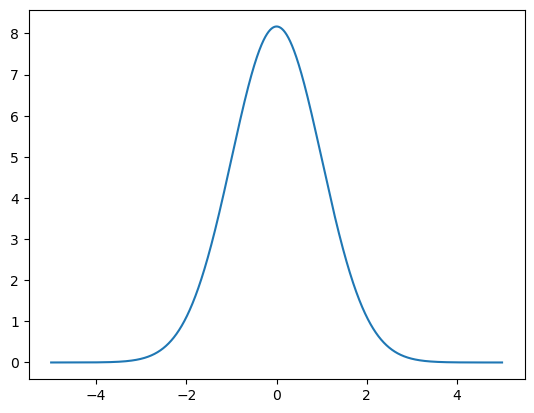

In [79]:
X = np.linspace(-5, 5, 2**d)
print(X)
plt.plot(X, b.full().flatten('F')[:2**d])
plt.show()

## Equation solution

We will use AMEN algorithm to solve diffusion equation

In [80]:
result = amen_solve(A, b, b, 1e-30)

amen_solve: swp=1, max_dx= 4.967E-01, max_res= 4.957E-01, max_rank=16
amen_solve: swp=2, max_dx= 3.650E-01, max_res= 2.179E+00, max_rank=16
amen_solve: swp=3, max_dx= 3.975E-01, max_res= 4.662E+00, max_rank=20
amen_solve: swp=4, max_dx= 7.230E-01, max_res= 6.109E+00, max_rank=23
amen_solve: swp=5, max_dx= 5.163E+00, max_res= 7.381E+00, max_rank=22
amen_solve: swp=6, max_dx= 3.589E+01, max_res= 5.593E+01, max_rank=26
amen_solve: swp=7, max_dx= 3.136E-01, max_res= 2.675E+00, max_rank=24
amen_solve: swp=8, max_dx= 2.403E-01, max_res= 2.794E+00, max_rank=28
amen_solve: swp=9, max_dx= 3.961E-01, max_res= 4.172E+00, max_rank=29
amen_solve: swp=10, max_dx= 3.694E-01, max_res= 3.483E+00, max_rank=28
amen_solve: swp=11, max_dx= 1.675E-01, max_res= 1.157E+00, max_rank=30
amen_solve: swp=12, max_dx= 2.606E-01, max_res= 2.619E+00, max_rank=28
amen_solve: swp=13, max_dx= 3.778E-01, max_res= 1.512E+00, max_rank=27
amen_solve: swp=14, max_dx= 6.778E-01, max_res= 6.149E+00, max_rank=26
amen_solve: swp

In [81]:
C = result.full().flatten('F')
C.shape

(4194304,)

In [96]:
from scipy.optimize import curve_fit

In [99]:
def curve(x, a, b, c):
    return c/(a * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - b) / a)**2) 


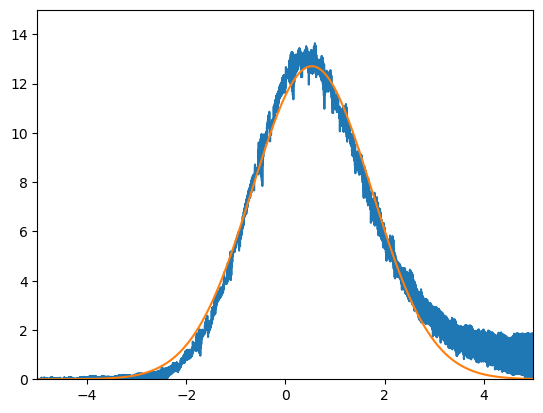

In [100]:
i=0
X = np.linspace(START_X, END_X, 2**d)
Y = C[2**d * i: 2**d * (i+1)]
p, _ = curve_fit(curve, X, Y, maxfev=1000)
a, b, c = p[0], p[1], p[2]
plt.plot(X, C[2**d * i: 2**d * (i+1)])
plt.plot(X, c / (a * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((X - b) / a)**2) )
plt.axis([-5, 5, 0, 15])
plt.show()

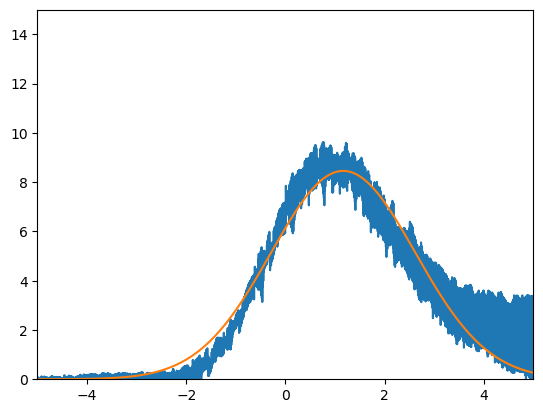

In [101]:
i=1
X = np.linspace(START_X, END_X, 2**d)
Y = C[2**d * i: 2**d * (i+1)]
p, _ = curve_fit(curve, X, Y, maxfev=1000)
a, b, c = p[0], p[1], p[2]
plt.plot(X, C[2**d * i: 2**d * (i+1)])
plt.plot(X, c / (a * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((X - b) / a)**2) )
plt.axis([-5, 5, 0, 15])
plt.show()

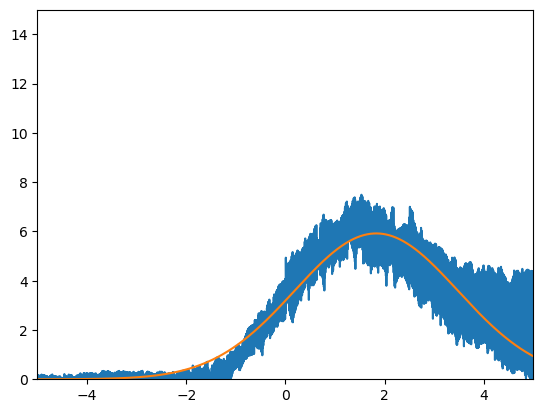

In [102]:
i=2
X = np.linspace(START_X, END_X, 2**d)
Y = C[2**d * i: 2**d * (i+1)]
p, _ = curve_fit(curve, X, Y, maxfev=1000)
a, b, c = p[0], p[1], p[2]
plt.plot(X, C[2**d * i: 2**d * (i+1)])
plt.plot(X, c / (a * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((X - b) / a)**2) )
plt.axis([-5, 5, 0, 15])
plt.show()

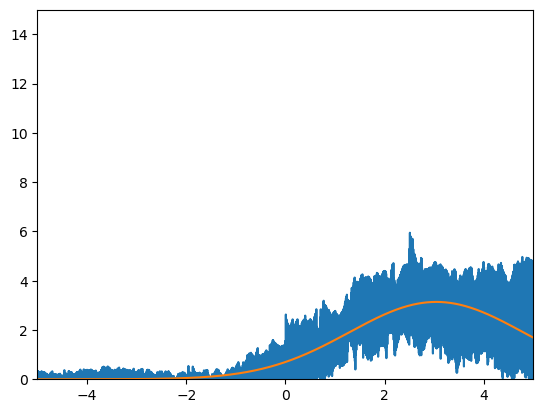

In [103]:
i=4
X = np.linspace(START_X, END_X, 2**d)
Y = C[2**d * i: 2**d * (i+1)]
p, _ = curve_fit(curve, X, Y, maxfev=1000)
a, b, c = p[0], p[1], p[2]
plt.plot(X, C[2**d * i: 2**d * (i+1)])
plt.plot(X, c / (a * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((X - b) / a)**2) )
plt.axis([-5, 5, 0, 15])
plt.show()

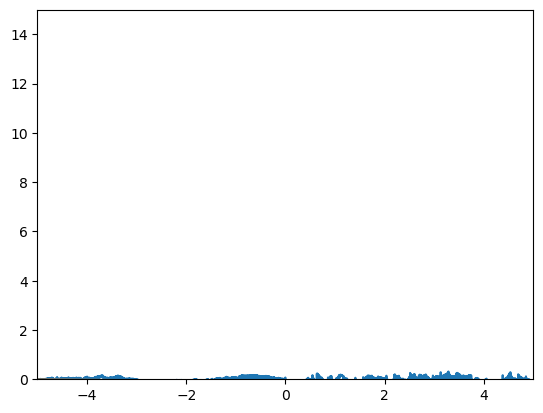

In [104]:
i=20
X = np.linspace(START_X, END_X, 2**d)
Y = C[2**d * i: 2**d * (i+1)]
p, _ = curve_fit(curve, X, Y, maxfev=1000)
a, b, c = p[0], p[1], p[2]
plt.plot(X, C[2**d * i: 2**d * (i+1)])
plt.plot(X, c / (a * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((X - b) / a)**2) )
plt.axis([-5, 5, 0, 15])
plt.show()

## Results:
As we see, we, definetly, have gaussian distribution at the begining which trasforms into a horizontal line close to zero in a period of time. 